In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
%matplotlib inline

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import classification_report
import seaborn as sns

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Conv1D, MaxPool1D, Input
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [26]:
train = pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv', header=None)
test = pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv', header=None)

In [6]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [8]:
train.shape

(87554, 188)

## Plotting the data to understand whether it's biased or not

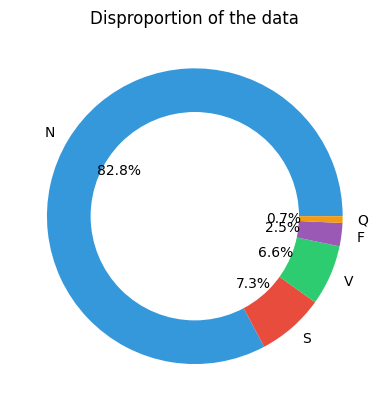

In [27]:

my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(train[187].value_counts(), 
        labels=['N', 'S', 'V', 'F', 'Q'], 
        autopct='%1.1f%%', 
        colors=['#3498DB', '#E74C3C', '#2ECC71', '#9B59B6', '#F39C12'])
plt.title('Disproportion of the data')
fig = plt.gcf()
fig.gca().add_artist(my_circle)
plt.show()

In [28]:
random_seed = 42 

df_0=(train[train[187]==0]).sample(n=20000,random_state=42)
df_1=train[train[187]==1]
df_2=train[train[187]==2]
df_3=train[train[187]==3]
df_4=train[train[187]==4]


df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=random_seed+1)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=random_seed+2)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=random_seed+3)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=random_seed+4)

train=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

#### Plotting the dataset after resampling

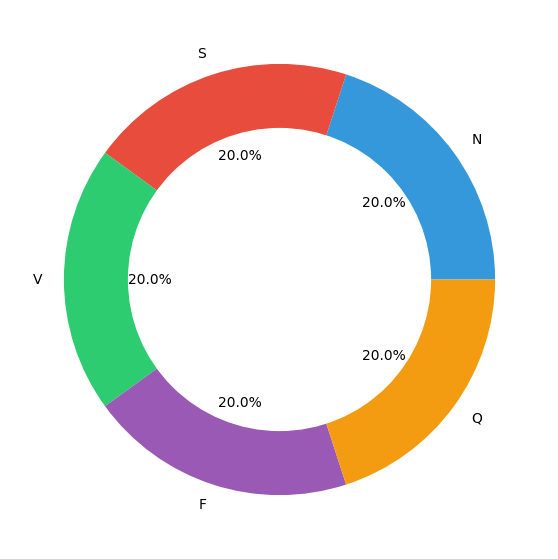

In [29]:
plt.figure(figsize=(7, 7))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(train[187].value_counts(), 
        labels=['N', 'S', 'V', 'F', 'Q'], 
        autopct='%1.1f%%', 
        colors=['#3498DB', '#E74C3C', '#2ECC71', '#9B59B6', '#F39C12'])
fig = plt.gcf()
fig.gca().add_artist(my_circle) 

plt.show()

Our data is ready to be fitted to our model after resampling.

### Creating x and y labels from our dataset


In [30]:
X_train, y_train = train.iloc[:, :187], train[187]
X_test, y_test = test.iloc[:, :187], test[187] 

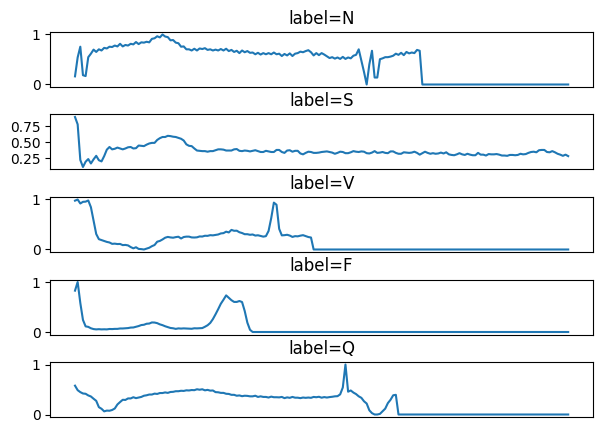

In [31]:
labels = {0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}
fig, ax = plt.subplots(5,1, figsize=(7,5), gridspec_kw={'hspace': 0.5})
for i in range(5):
    ax[i].plot(X_train[y_train==i].iloc[0])
    ax[i].set_title(f'label={labels[i]}')
    ax[i].set_xticks([])

### Data normalization

To normalize the data, I use StandartScaler from the Skelearn library, which uses Z score normalization. I use the same Scaler object for tests, so I use mu and sigma from X_train because we shouldn't learn anything from the test dataset.

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

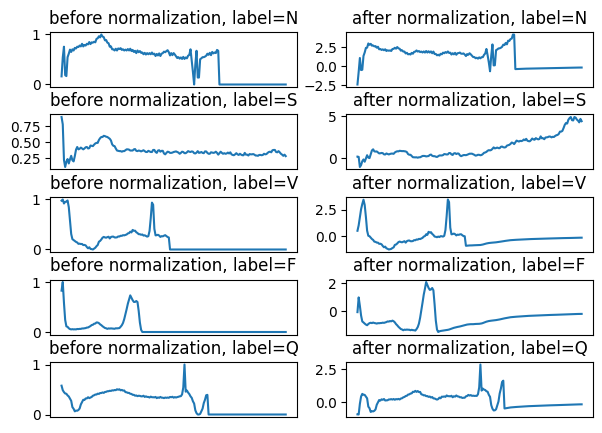

In [14]:
labels = {0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}
fig, ax = plt.subplots(5,2, figsize=(7,5), gridspec_kw={'hspace': 0.5})
for i in range(5):
    ax[i][0].plot(X_train[y_train==i].iloc[0])
    ax[i][1].plot(X_train_norm[y_train==i][0])
    ax[i][0].set_title(f'before normalization, label={labels[i]}')
    ax[i][0].set_xticks([])
    ax[i][1].set_xticks([])
    ax[i][1].set_title(f'after normalization, label={labels[i]}')

In [33]:
(X_train.shape[1],1)

(187, 1)

## CNN model

In [34]:

model = Sequential([
    Input(shape=(X_train_norm.shape[1], 1)),
    Conv1D(128, 11, activation='relu', padding='Same'),
    MaxPool1D(pool_size=3, strides=2, padding='same'),
    Conv1D(64, 3, activation='relu', padding='Same'),
    MaxPool1D(pool_size=3, strides=2, padding='same'),
    Conv1D(64, 3, activation='relu', padding='Same'),
    MaxPool1D(pool_size=3, strides=2, padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')  # 5 classes output
])

In [35]:
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Model Training
model.fit(X_train_norm, y_train, epochs=20, batch_size=32)

# Predictions
pred = model.predict(X_test_norm)
y_test_pred = np.argmax(pred, axis=1)

# Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Classification Report
print(classification_report(y_test, y_test_pred))

# ROC AUC and Precision-Recall AUC
roc_auc = roc_auc_score(y_test, pred, multi_class='ovr')
print(f"ROC AUC: {roc_auc}")

# Precision-Recall Curve and AUC
precision_all, recall_all, _ = precision_recall_curve(y_test, pred[:, 1])  # Only for binary
pr_auc = auc(recall_all, precision_all)
print(f"Precision-Recall AUC: {pr_auc}")

# Plots
# Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['N', 'S', 'V', 'F', 'Q'], yticklabels=['N', 'S', 'V', 'F', 'Q'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, pred[:, 1])  # ROC curve for class 1
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', label="ROC Curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(8, 8))
plt.plot(recall_all, precision_all, color='green', label="Precision-Recall Curve (area = %0.2f)" % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:625: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8681 - loss: 0.3744
Epoch 2/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9691 - loss: 0.0900
Epoch 3/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9800 - loss: 0.0580
Epoch 4/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9869 - loss: 0.0407
Epoch 5/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9893 - loss: 0.0335
Epoch 6/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9907 - loss: 0.0289
Epoch 7/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9916 - loss: 0.0264
Epoch 8/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9938 - loss: 0.0204
Epoch 9/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9936 - loss: 0.0203
Epoch 10/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9953 - loss: 0.0146
Epoch 11/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9946 - loss: 0.0180
Epoch 12/20
3125/3125 ━━━━━━━━━━━━━━━━━━

ValueError: multiclass format is not supported

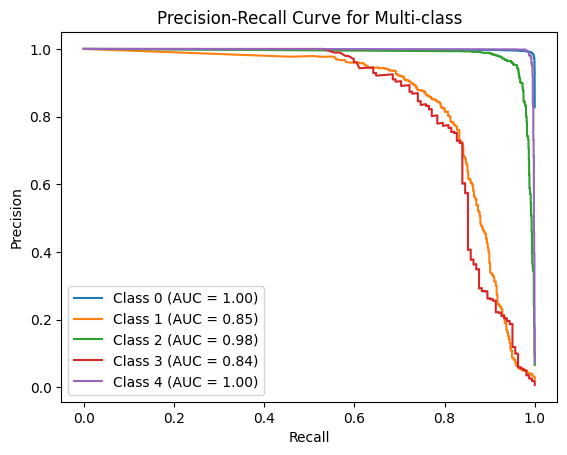

Class 0 Precision-Recall AUC: 1.00
Class 1 Precision-Recall AUC: 0.85
Class 2 Precision-Recall AUC: 0.98
Class 3 Precision-Recall AUC: 0.84
Class 4 Precision-Recall AUC: 1.00


In [36]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])  # Assuming 5 classes
pred_prob = pred  # These are the softmax probabilities from the model

precision_list = []
recall_list = []
pr_auc_list = []

for i in range(5):  # For each class (0: N, 1: S, 2: V, 3: F, 4: Q)
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], pred_prob[:, i])
    pr_auc = auc(recall, precision)
    
    precision_list.append(precision)
    recall_list.append(recall)
    pr_auc_list.append(pr_auc)

    # Plot Precision-Recall curve for each class
    plt.plot(recall, precision, label=f'Class {i} (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multi-class')
plt.legend(loc='lower left')
plt.show()

# Print the AUC for each class
for i in range(5):
    print(f"Class {i} Precision-Recall AUC: {pr_auc_list[i]:.2f}")


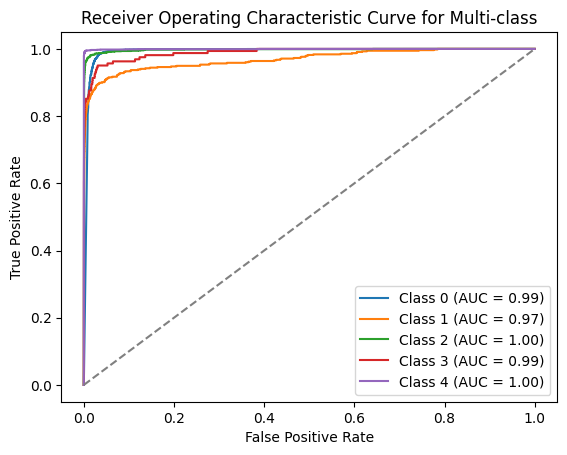

Class 0 ROC AUC: 0.99
Class 1 ROC AUC: 0.97
Class 2 ROC AUC: 1.00
Class 3 ROC AUC: 0.99
Class 4 ROC AUC: 1.00


In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr_list, tpr_list, roc_auc_list = [], [], []

for i in range(5):  
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve for Multi-class')
plt.legend(loc='lower right')
plt.show()

# Print the AUC for each class
for i in range(5):
    print(f"Class {i} ROC AUC: {roc_auc_list[i]:.2f}")


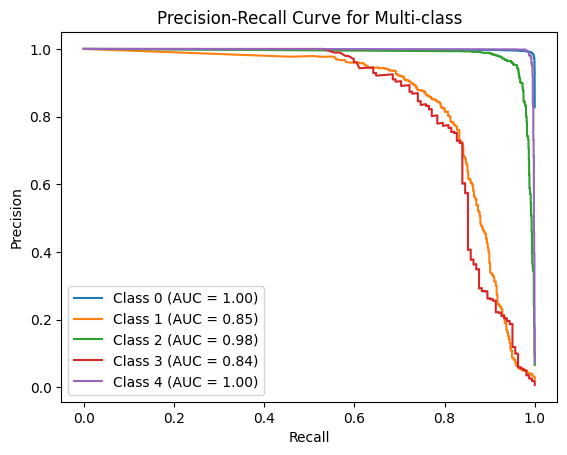

Class 0 Precision-Recall AUC: 1.00
Class 1 Precision-Recall AUC: 0.85
Class 2 Precision-Recall AUC: 0.98
Class 3 Precision-Recall AUC: 0.84
Class 4 Precision-Recall AUC: 1.00


In [39]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
pred_prob = pred  

precision_list = []
recall_list = []
pr_auc_list = []

for i in range(5):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], pred_prob[:, i])
    pr_auc = auc(recall, precision)
    
    precision_list.append(precision)
    recall_list.append(recall)
    pr_auc_list.append(pr_auc)

    plt.plot(recall, precision, label=f'Class {i} (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multi-class')
plt.legend(loc='lower left')
plt.show()

for i in range(5):
    print(f"Class {i} Precision-Recall AUC: {pr_auc_list[i]:.2f}")
